# SHAP

In [1]:
# Pandas
import pandas as pd

# Some sklearn tools for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Tree based algorithms
from sklearn.ensemble import RandomForestClassifier

# XAI
import shap

In [2]:
# Leemos el dataset.
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
features = names[:-1]
df = pd.read_csv("data/pima-indians-diabetes.csv", names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
count_class = df.groupby("class").size()
count_class

class
0    500
1    268
dtype: int64

In [4]:
# Dividimos el dataset en train/test.
X = df.drop("class", axis=1)
Y = df["class"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

### Random Forest

In [5]:
# Creamos el modelo RandomForest y lo entrenamos.
rf_model = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

In [6]:
# Probamos la precisión del modelo.
y_predicted = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predicted)
print("Precisión: ",  accuracy*100, "%")

Precisión:  75.98425196850394 %


In [7]:
# SHAP
shap.initjs()

In [8]:
# Creamos el explainer con nuestro modelo.
explainer = shap.TreeExplainer(rf_model)

In [9]:
# Obtenemos una observación.
i = 0
observation = x_test.iloc[i]
print(observation)
print("Expected: ", y_test.iloc[i])

preg      4.000
plas    120.000
pres     68.000
skin      0.000
test      0.000
mass     29.600
pedi      0.709
age      34.000
Name: 167, dtype: float64
Expected:  0


In [10]:
shap_values = explainer.shap_values(observation)
shap.force_plot(explainer.expected_value[0], shap_values[0], features=observation)

In [11]:
all_shap_values = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value[0], all_shap_values[0], features=x_train)

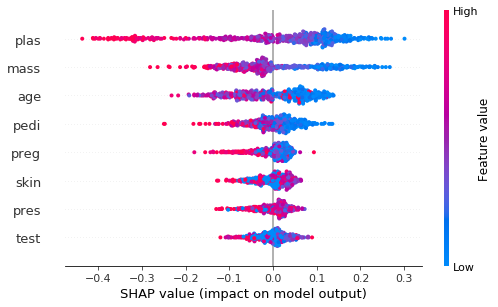

In [12]:
shap.summary_plot(all_shap_values[0], features=x_train, feature_names=features)